In [1]:
import pandas as pd

# قراءة البيانات
df = pd.read_csv('/content/heart.csv')

# عرض أول 10 صفوف
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [2]:
# عدد الصفوف والأعمدة
print(df.shape)

# نوع كل عمود
print(df.dtypes)

# معلومات شاملة
print(df.info())

# إحصائيات وصفية
print(df.describe())

(303, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  t

In [3]:
# age
# العمر بالسنوات
# sex
# الجنس (0 = أنثى، 1 = ذكر)
# cp
# نوع الألم في الصدر (0: Typical angina, 1: Atypical angina, 2: Non-anginal pain, 3: Asymptomatic)
# trestbps
# ضغط الدم أثناء الراحة (mm Hg)
# chol
# الكوليسترول في الدم (mg/dl)
# fbs
# نسبة السكر في الدم أثناء الصيام > 120 mg/dl (1 = true; 0 = false)
# restecg
# نتائج كهرو القلب أثناء الراحة (0: Normal, 1: ST-T wave abnormality, 2: Left ventricular hypertrophy)
# thalach
# الحد الأقصى لمعدل ضربات القلب
# exang
# ألم صدر بسبب ممارسة الرياضة (1 = yes, 0 = no)
# oldpeak
# انخفاض ST segment الناتج عن ممارسة النشاط البدني مقارنة بالراحة
# slope
# ميل قطعة ST في الرسم البياني (0: Upsloping, 1: Flat, 2: Downsloping)
# ca
# عدد الأوعية الدموية الرئيسية التي تم تصويرها بواسطة الفلوروسكوبي (0–3)
# thal
# اختصار لـ Thalassemia (معدل الدم): 3 = normal; 6 = fixed defect; 7 = reversible defect
# target
# هل المريض لديه مرض في القلب أم لا (0 = لا، 1 = نعم)

In [4]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


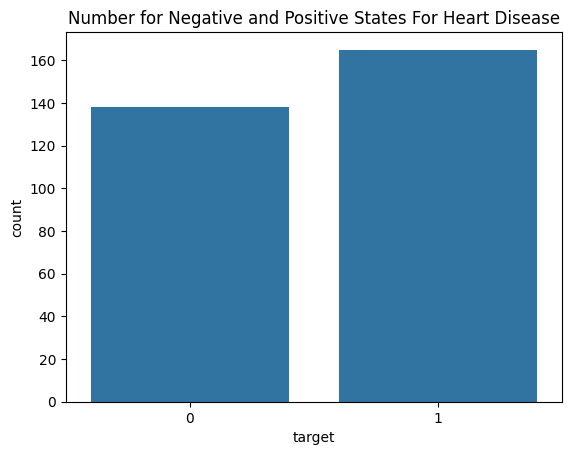

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='target')
plt.title("Number for Negative and Positive States For Heart Disease")
plt.show()

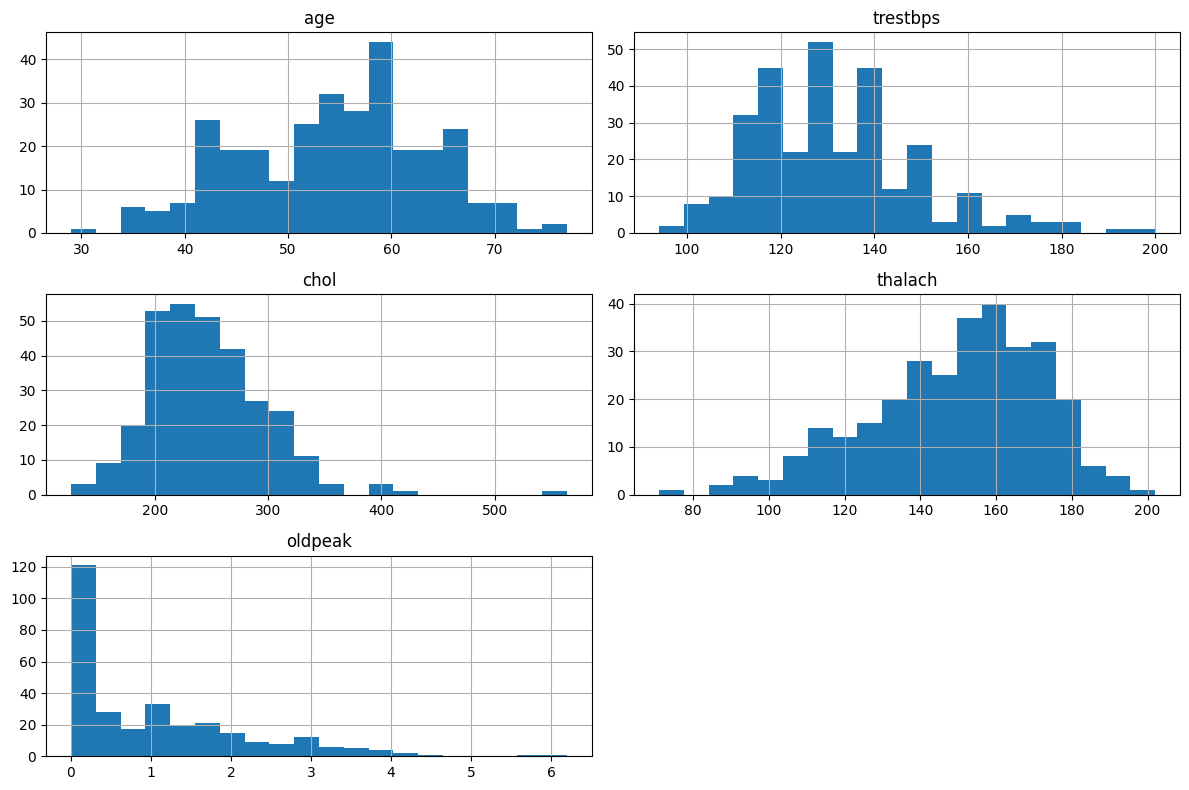

In [6]:
# رسم بياني للتوزيع:
#  تحليل المتغيرات العددية (Numerical Features)
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].hist(bins=20, figsize=(12, 8))
plt.tight_layout()
plt.show()

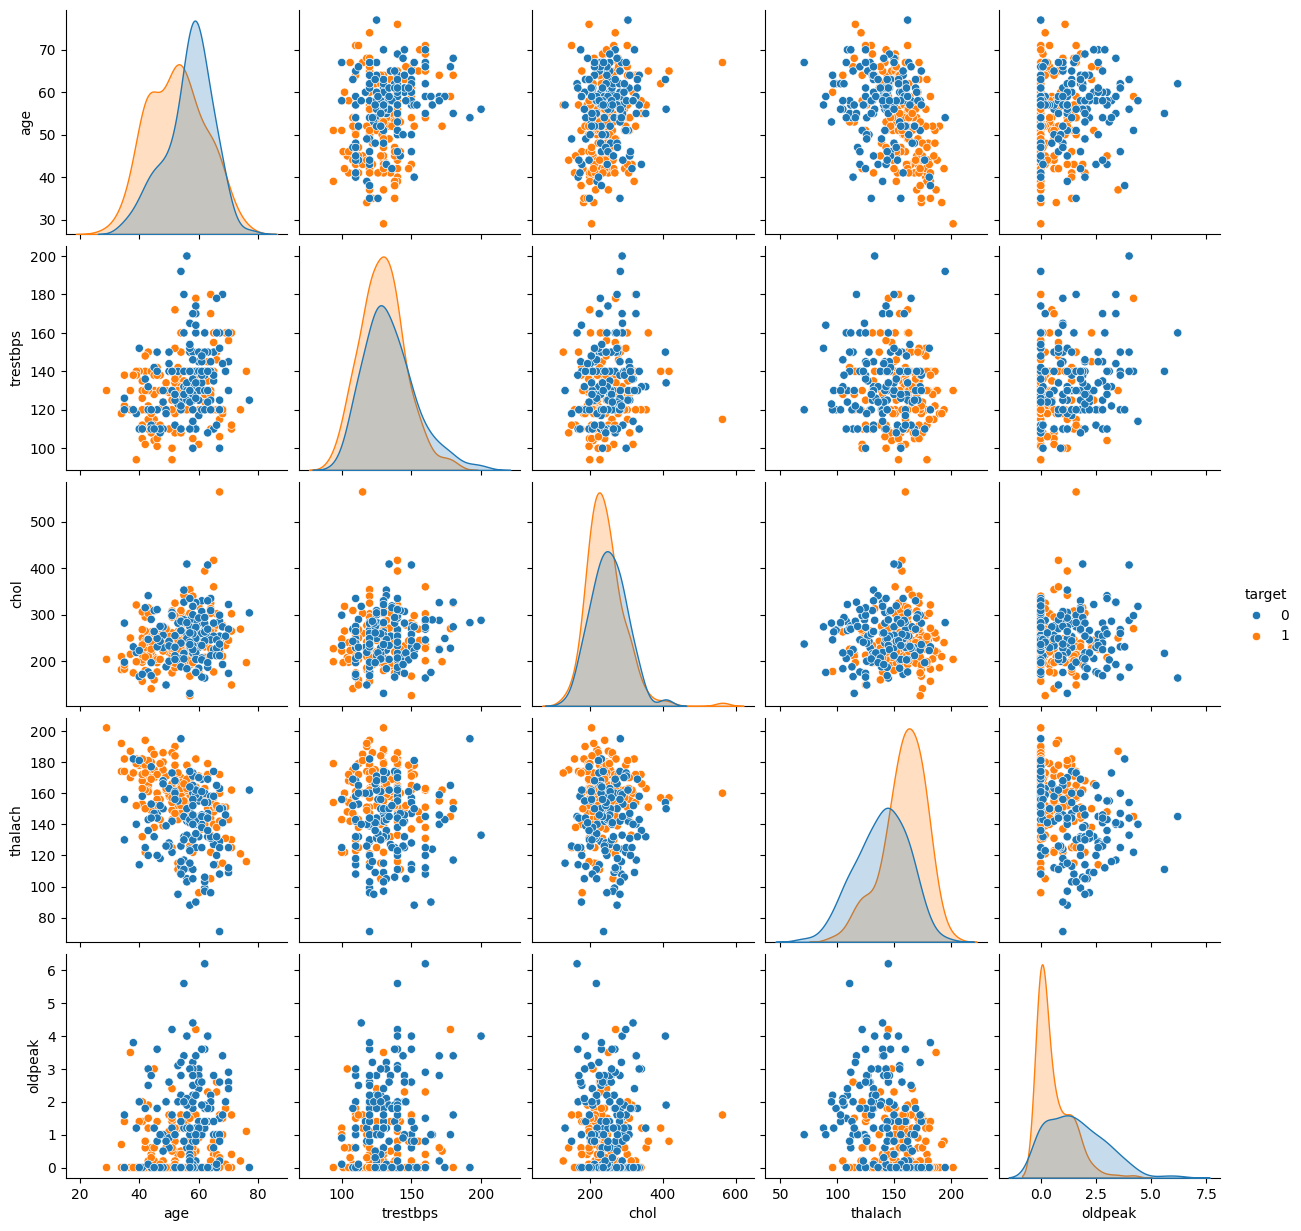

In [7]:
sns.pairplot(data=df, hue='target', vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])
plt.show()

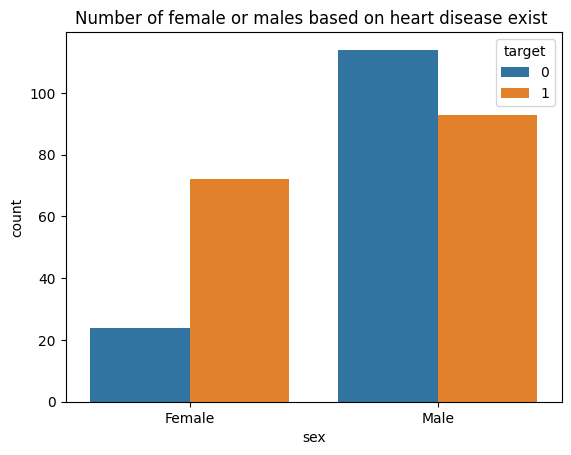

In [8]:
# تحليل المتغيرات النوعية (Categorical Features)
# مثل: الجنس، نوع الألم، نتيجة كهرو القلب

# مثال: العلاقة بين الجنس ووجود المرض:

sns.countplot(data=df, x='sex', hue='target')
plt.xticks([0, 1], ['Female', 'Male'])
plt.title("Number of female or males based on heart disease exist ")
plt.show()

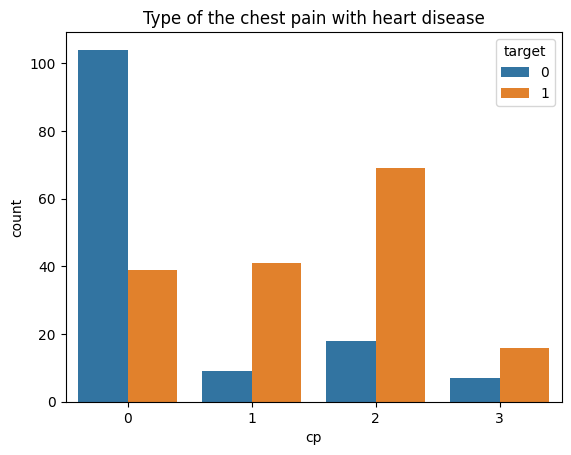

In [9]:
#نوع الألم في الصدر vs المرض:
sns.countplot(data=df, x='cp', hue='target')
plt.title("Type of the chest pain with heart disease")
plt.show()

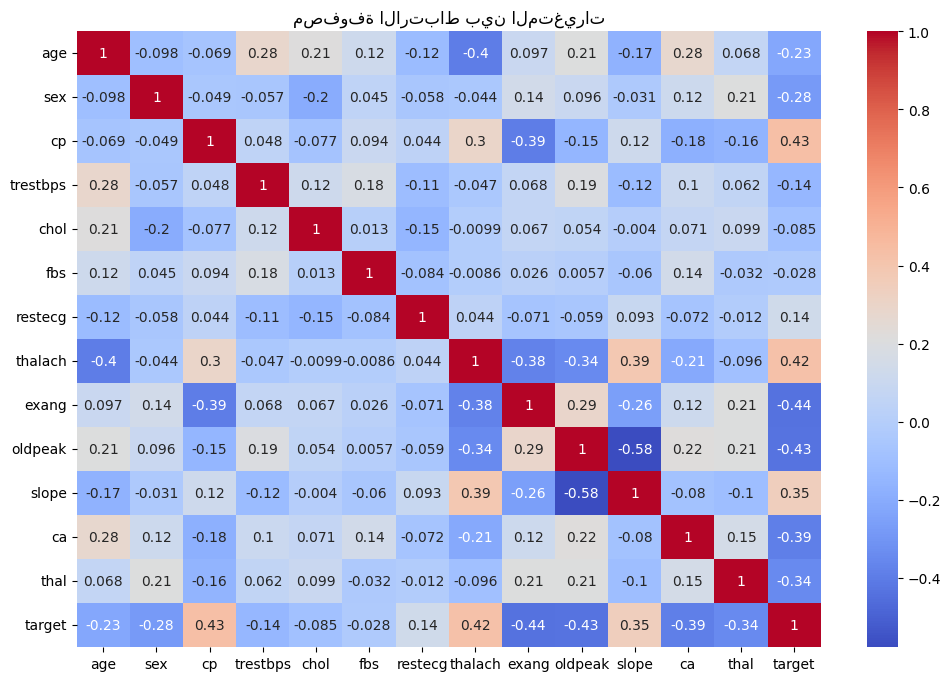

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("مصفوفة الارتباط بين المتغيرات")
plt.show()

In [11]:
df['target'].value_counts()

,count
target,
1,165
0,138


In [12]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 21.2 MB/s eta 0:00:00


In [14]:
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]
    return df

numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df = remove_outliers(df, numeric_cols)

In [15]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['cp', 'restecg', 'slope', 'thal']

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:02:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


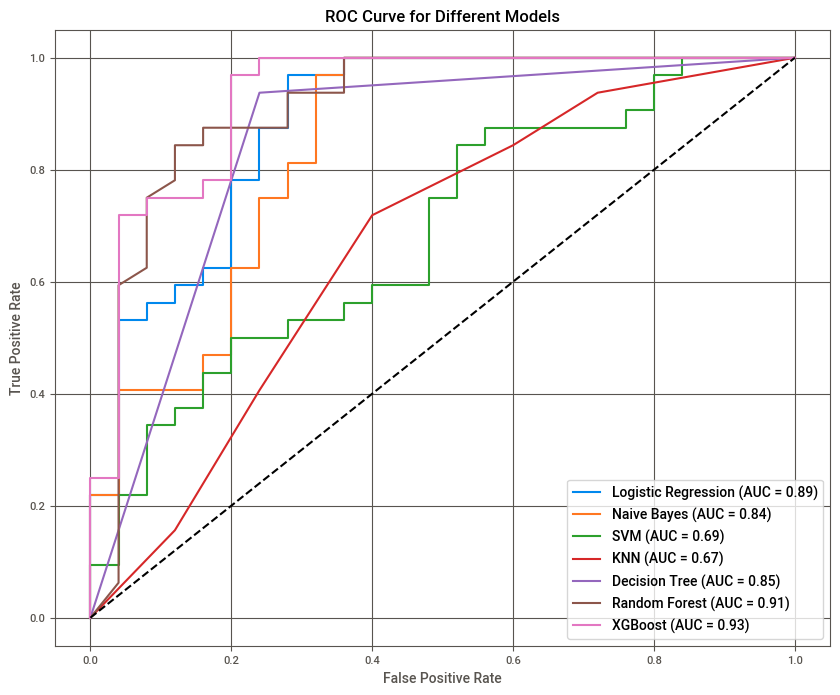

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# تعريف النماذج
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name}:")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression:
              precision    recall  f1-score   support

           0       0.94      0.64      0.76        25
           1       0.78      0.97      0.86        32

    accuracy                           0.82        57
   macro avg       0.86      0.80      0.81        57
weighted avg       0.85      0.82      0.82        57

[[16  9]
 [ 1 31]]

Naive Bayes:
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        25
           1       0.78      0.88      0.82        32

    accuracy                           0.79        57
   macro avg       0.79      0.78      0.78        57
weighted avg       0.79      0.79      0.79        57

[[17  8]
 [ 4 28]]

SVM:
              precision    recall  f1-score   support

           0       0.71      0.48      0.57        25
           1       0.68      0.84      0.75        32

    accuracy                           0.68        57
   macro avg       0.69      0.66      0.66     

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:02:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost:
              precision    recall  f1-score   support

           0       1.00      0.76      0.86        25
           1       0.84      1.00      0.91        32

    accuracy                           0.89        57
   macro avg       0.92      0.88      0.89        57
weighted avg       0.91      0.89      0.89        57

[[19  6]
 [ 0 32]]


In [19]:
from sklearn.model_selection import cross_val_score

# مثال: باستخدام Random Forest
model = RandomForestClassifier()

# استخدام 5-folds
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-validation Accuracy Scores:", scores)
print("Mean CV Accuracy:", scores.mean())

Cross-validation Accuracy Scores: [0.8245614  0.89473684 0.80701754 0.8245614  0.75      ]
Mean CV Accuracy: 0.8201754385964911


In [20]:
#Feature Engineering
# نسبة الكوليسترول إلى ضربات القلب القصوى
df['chol_thalach_ratio'] = df['chol'] / df['thalach']

# مؤشر خطر عام (مثال بسيط)
df['heart_risk_index'] = df['age'] + df['trestbps'] + df['chol'] - df['thalach']

X = df.drop('target', axis=1)
y = df['target']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
#Ensemble Methods (مثل Voting Classifier)
# دمج عدة نماذج لتحسين الأداء.
from sklearn.ensemble import VotingClassifier

# تعريف النماذج الأساسية
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# دمج النماذج
voting_model = VotingClassifier(
    estimators=[('lr', model1), ('rf', model2), ('xgb', model3)],
    voting='soft'
)

voting_model.fit(X_train, y_train)
y_pred = voting_model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:05:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier Accuracy: 0.8596491228070176


In [23]:
#Stacking (التجميع الهرمي للنماذج)
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# تعريف النماذج الأساسية
base_models = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('knn', KNeighborsClassifier()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# النموذج النهائي (meta-model)
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression()
)

stacking_model.fit(X_train, y_train)
y_pred = stacking_model.predict(X_test)

print("Stacking Classifier Accuracy:", accuracy_score(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:06:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-

Stacking Classifier Accuracy: 0.8596491228070176


In [24]:
# Precision للصف 1 (كم عدد الحالات الإيجابية التي تم تصنيفها بشكل صحيح؟)
# Recall للصف 1 (كم نسبة الحالات الإيجابية التي تم اكتشافها؟)
# F1-Score (التوازن بين Precision و Recall)

In [26]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.72      0.82        25
           1       0.82      0.97      0.89        32

    accuracy                           0.86        57
   macro avg       0.88      0.84      0.85        57
weighted avg       0.87      0.86      0.86        57



In [27]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[18  7]
 [ 1 31]]


In [28]:
# True Negatives (TN)
# False Positives (FP)
# False Negatives (FN)
# True Positives (TP)

In [31]:
import pandas as pd
from xgboost import XGBClassifier

# تدريب النموذج أولًا
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)

# بيانات المريض الجديد
new_data = pd.DataFrame({
    'age': [57],
    'sex': [1],
    'cp': [2],
    'trestbps': [150],
    'chol': [168],
    'fbs': [0],
    'restecg': [1],
    'thalach': [174],
    'exang': [0],
    'oldpeak': [1.6],
    'slope': [2],
    'ca': [0],
    'thal': [2],
    'chol_thalach_ratio': [168/174],   # Feature Engineering
    'heart_risk_index': [57+150+168-174]  # Feature Engineering
})

# التنبؤ
prediction = xgb.predict(new_data)[0]
probability = xgb.predict_proba(new_data)[0][1]

if prediction == 1:
    print(f"النموذج توقع وجود مرض في القلب بنسبة احتمالية: {probability*100:.2f}%")
else:
    print(f"النموذج لم يتوقع وجود مرض في القلب بنسبة احتمالية: {(1-probability)*100:.2f}%")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:36:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


النموذج توقع وجود مرض في القلب بنسبة احتمالية: 99.69%


AUC Score: 0.92875


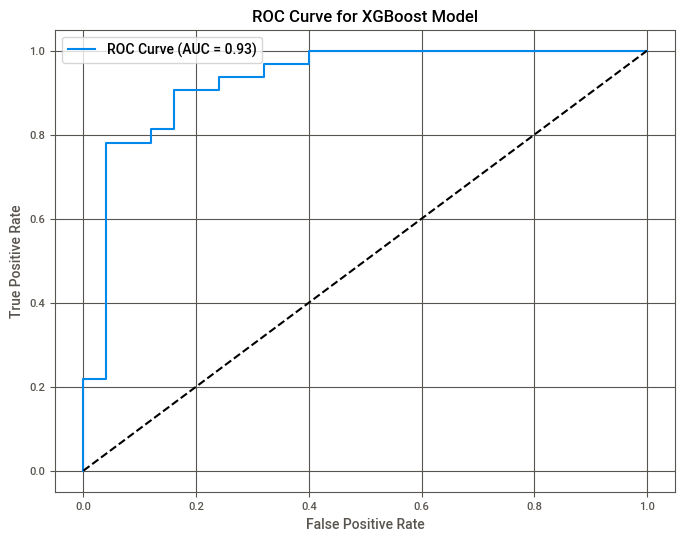

In [32]:
# التنبؤ بالاحتمالات
y_proba = xgb.predict_proba(X_test)[:, 1]  # احتمالات الفئة الإيجابية (وجود المرض)

# حساب AUC
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(y_test, y_proba)
print("AUC Score:", auc)

# رسم ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # خط التشويش العشوائي
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Model')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# ROC تعني "Receiver Operating Characteristic".
# هو رسم بياني يوضح أداء نموذج التصنيف عند عتبات تصنيف مختلفة.
# يساعدك على تقييم قدرة النموذج على التمييز بين الفئة الإيجابية والفئة السلبية.
# محاور الرسم:

# المحور السيني (X-axis): يمثل "False Positive Rate" (FPR).
# وهي نسبة الحالات السلبية التي تم تصنيفها خطأ على أنها إيجابية (FP / (FP + TN)).
# المحور الصادي (Y-axis): يمثل "True Positive Rate" (TPR).
# وهي نسبة الحالات الإيجابية التي تم تصنيفها بشكل صحيح على أنها إيجابية (TP / (TP + FN)). ويُعرف أيضًا باسم "Recall" أو "Sensitivity".
# كيف تقرأ الرسم:

# المنحنى: يمثل أداء النموذج. كل نقطة على المنحنى تمثل عتبة تصنيف مختلفة.
# العتبة المرتفعة: إذا كانت عتبة التصنيف عالية (مثل 0.9)، سيكون عدد الحالات الإيجابية الكاذبة (FP) قليلًا، لكن قد تفقد بعض الحالات الإيجابية الحقيقية (FN)، مما يؤدي إلى انخفاض في كل من FPR و TPR (تتحرك نحو الزاوية السفلية اليسرى).
# العتبة المنخفضة: إذا كانت عتبة التصنيف منخفضة (مثل 0.1)، سيكون عدد الحالات الإيجابية الحقيقية (TP) أكبر، لكن أيضًا عدد الحالات الإيجابية الكاذبة (FP) سيزداد، مما يؤدي إلى ارتفاع في كل من FPR و TPR (تتحرك نحو الزاوية العلوية اليمنى).
# الخط المتقطع (القطري): يمثل أداء نموذج تصنيف عشوائي (Random Classifier). لا يقدم أي قدرة حقيقية على التمييز.
# أي نموذج أداءه يتبع هذا الخط يعتبر ضعيفًا جدًا.
# الزاوية العلوية اليسرى (0, 1): هي النقطة المثالية. تمثل نموذجًا مثاليًا لديه TPR=1 (يكتشف كل الحالات الإيجابية) و FPR=0 (لا يصنف أي حالة سلبية بشكل خاطئ). كلما اقترب منحنى النموذج من هذه النقطة، كان أداؤه أفضل.
# AUC (Area Under the Curve):

# AUC هي القيمة المساحة تحت منحنى ROC.
# تُعطى كقيمة تتراوح بين 0 و 1.
# كلما كانت قيمة AUC أقرب إلى 1، كان أداء النموذج أفضل في التمييز بين الفئات.
# قيمة AUC قريبة من 0.5 تشير إلى أن النموذج ليس أفضل من التخمين العشوائي.
# في الكود، تم حساب قيمة AUC وطباعتها ورسمها على المنحنى لتوضيح أداء كل نموذج.
# ملخص لكيفية القراءة في سياق الكود الخاص بك:

# الرسم يوضح منحنيات ROC لعدة نماذج تصنيف
# انظر إلى كل منحنى على حدة: كلما كان المنحنى أعلى (أقرب إلى الزاوية العلوية اليسرى)، كان أداء النموذج أفضل.
# انظر إلى قيمة AUC المكتوبة بجوار اسم كل نموذج في وسيلة الإيضاح (legend). النموذج ذو قيمة AUC الأعلى هو الأفضل بشكل عام في التمييز بين وجود مرض القلب وعدم وجوده.
# الخط المتقطع يوضح مدى تحسن نماذجك مقارنة بالتخمين العشوائي.